#### 該文件包含1,338個案例，即目前已經登記過的保險計劃受益者、病人特點和計劃計入的總醫療費用特徵:

* age:表示主要受益者年齡
* sex:性別
* bmi:身體質量指數,理想BMI在18.5~24.9之間
* children:表示保險計劃中所包括的孩子/受撫養者的數量
* smoker:表示被保險人是否經常吸煙
* region:受益者在美國的居住地-東北(northeast), 東南(sotheast), 西南(southwest)和東北(northwest)
* charges:醫療費用

#### 目的:檢測與醫療費用相關之變量，找出在醫療費用上具高風險的人

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
#指定要encode的欄位
colume_ready_to_encode = ["sex","smoker","region"]
#建立label encoder物件
label_encoder = LabelEncoder()

# 對指定的欄位進行標籤編碼
for column in colume_ready_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# 打印編碼後的 DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges  sex_encoded  \
0   19  female  27.900         0    yes  southwest  16884.92400            0   
1   18    male  33.770         1     no  southeast   1725.55230            1   
2   28    male  33.000         3     no  southeast   4449.46200            1   
3   33    male  22.705         0     no  northwest  21984.47061            1   
4   32    male  28.880         0     no  northwest   3866.85520            1   

   smoker_encoded  region_encoded  
0               1               3  
1               0               2  
2               0               2  
3               0               1  
4               0               1  


In [7]:
#複製一個新的drop掉原本的df
post_encode = pd.DataFrame()
post_encode = df.copy()


post_encode = post_encode.drop(columns=["sex","smoker","region"])

print(post_encode.head())



   age     bmi  children      charges  sex_encoded  smoker_encoded  \
0   19  27.900         0  16884.92400            0               1   
1   18  33.770         1   1725.55230            1               0   
2   28  33.000         3   4449.46200            1               0   
3   33  22.705         0  21984.47061            1               0   
4   32  28.880         0   3866.85520            1               0   

   region_encoded  
0               3  
1               2  
2               2  
3               1  
4               1  


In [10]:
from sklearn import preprocessing
#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()


# 資料標準化
x_minmax = minmax.fit_transform(post_encode[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded', 'charges']])


In [11]:
x_minmax

array([[0.02173913, 0.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

In [12]:
x_minmax= pd.DataFrame(x_minmax, columns=['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded', 'charges'])

In [13]:
print(x_minmax)

           age  sex_encoded       bmi  children  smoker_encoded  \
0     0.021739          0.0  0.321227       0.0             1.0   
1     0.000000          1.0  0.479150       0.2             0.0   
2     0.217391          1.0  0.458434       0.6             0.0   
3     0.326087          1.0  0.181464       0.0             0.0   
4     0.304348          1.0  0.347592       0.0             0.0   
...        ...          ...       ...       ...             ...   
1333  0.695652          1.0  0.403820       0.6             0.0   
1334  0.000000          0.0  0.429379       0.0             0.0   
1335  0.000000          0.0  0.562012       0.0             0.0   
1336  0.065217          0.0  0.264730       0.0             0.0   
1337  0.934783          0.0  0.352704       0.0             1.0   

      region_encoded   charges  
0           1.000000  0.251611  
1           0.666667  0.009636  
2           0.666667  0.053115  
3           0.333333  0.333010  
4           0.333333  0.043816

# 設定特徵和標籤
把資料集切成 X y 用iloc定義  
y 需要用成reshape因為回歸預測值格式  
  
# 切分 資料集成 7/3分  


In [14]:
X = post_encode.iloc[:, 0:5].values
y = post_encode.iloc[:, 6].values.reshape(-1,1)

In [15]:
# 分割訓練和測試 在把剛剛的X y切成訓練跟測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [16]:
# print出剛剛切分完的 x y 
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(936, 5)
Shape of X_test:(402, 5)
Shape of y_train:(936, 1)
Shape of y_test(402, 1)


In [18]:
post_encode.isnull().sum()

age               0
bmi               0
children          0
charges           0
sex_encoded       0
smoker_encoded    0
region_encoded    0
dtype: int64

# 檢查變數之間相關性

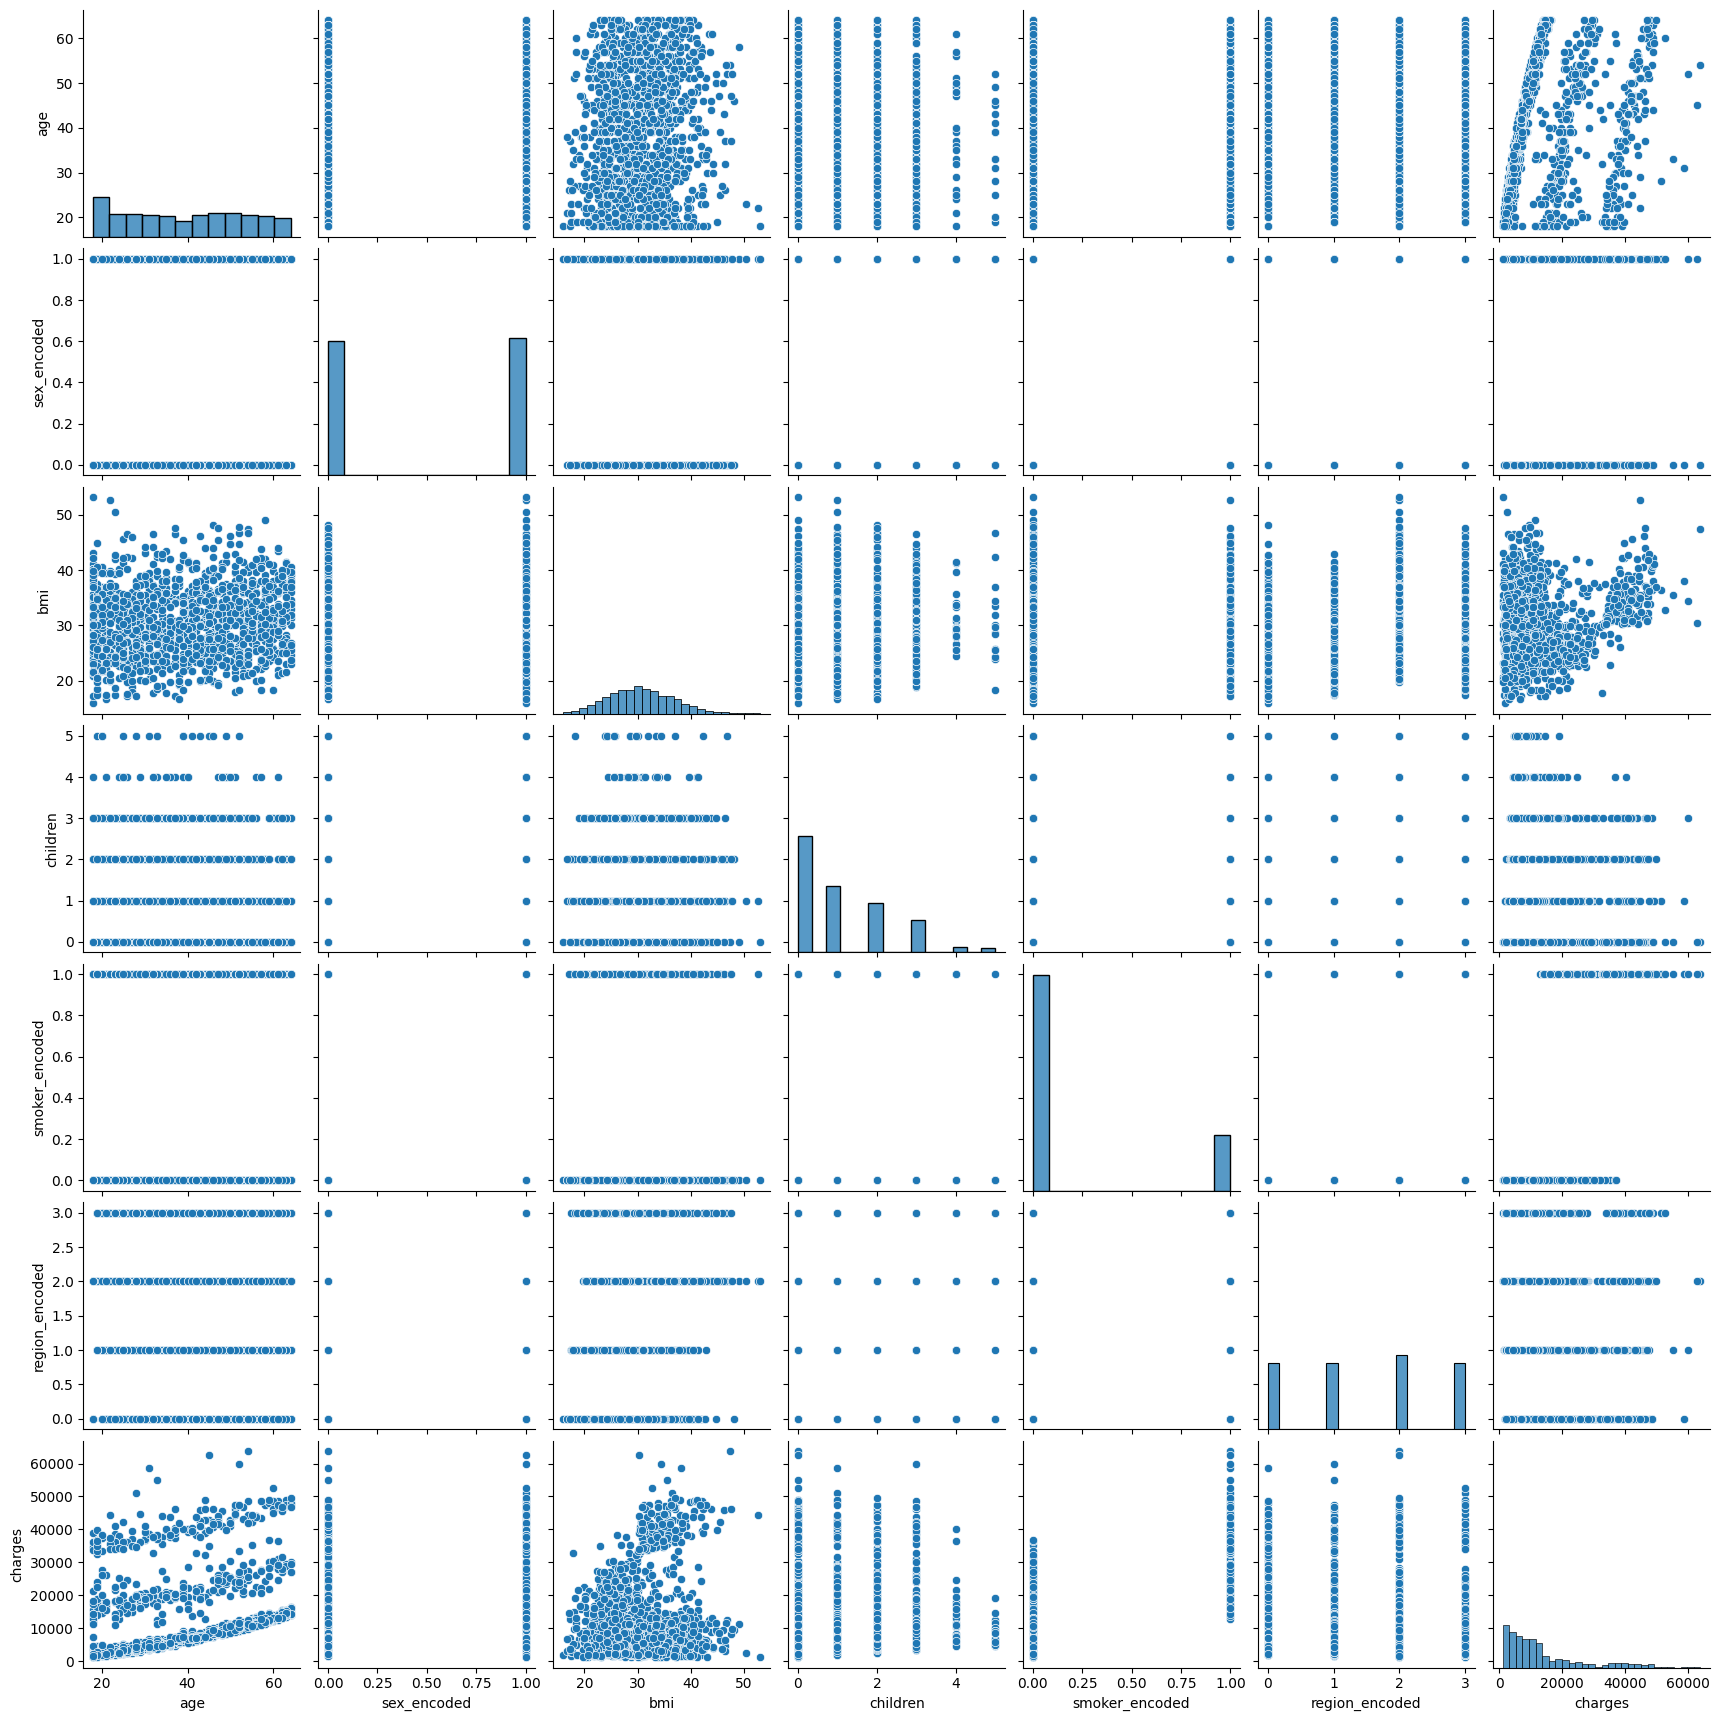

In [8]:
import seaborn as sns 
sns.pairplot(post_encode[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded', 'charges']])


<Axes: >

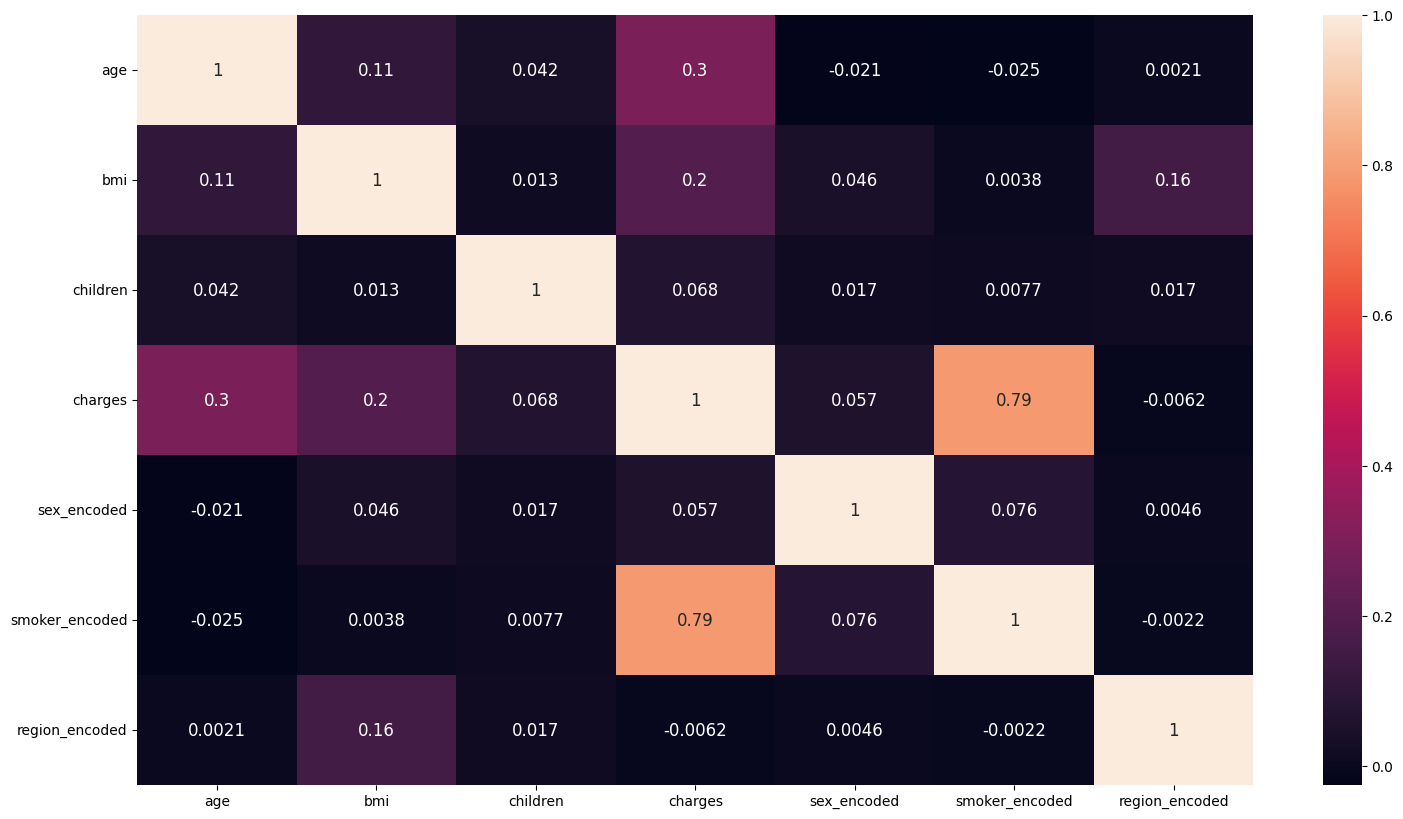

In [9]:
import matplotlib.pyplot as plt
corrmat = post_encode.corr()
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot = True, annot_kws={'size':12})


# Modeling

In [19]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.023523782577243635
R2_score (test):  0.026688529610864542
RMSE:  1.1000415904170207
RMSE:  1.0691053724479862


# 用最小平方法把特徵做重要性排序

In [23]:
#用最小平方法對特徵做 重要性P值的計算

X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())
# P  < .05, P  < .01,P  < .001

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.282
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           9.67e-07
Time:                        15:29:36   Log-Likelihood:                -2013.5
No. Observations:                1338   AIC:                             4039.
Df Residuals:                    1332   BIC:                             4070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6423      0.172      3.741      0.0

### <span style="color:#3498DB">Test: 請將不顯著的變數與您覺得可能具有共線性的變數進行處理，再次跑迴歸，並觀察各類檢測數值是否有優化</span>

In [25]:
# 給值去做預測

to_be_predicted = np.array([
    [2.9850e-02, 0.0000e+00,  3.0000e+00, 2.2200e+02,
       1.8700e+01]
])
predicted_charge = regressor_linear.predict(to_be_predicted)

In [26]:
# print出預測結果

print(predicted_charge)

[[-0.50683391]]
